# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [64]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [65]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units=Imperial&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vadso
Processing Record 2 of Set 1 | dodge city
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | minas de marcona
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | tongchuanshi
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | pasni
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | puerto baquerizo moreno
Processing Record 21 of Set 1 | chibougamau
Processing Record 22 of Set 1 | edinburgh

In [66]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [67]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vadso,70.0744,29.7487,23.16,74,100,16.11,NO,1707096915
1,dodge city,37.7528,-100.0171,41.95,94,100,14.97,US,1707096915
2,cockburn town,21.4612,-71.1419,76.96,78,40,12.66,TC,1707096916
3,atafu village,-8.5421,-172.5159,84.25,79,100,23.35,TK,1707096916
4,adamstown,-25.0660,-130.1015,77.32,77,100,10.69,PN,1707096916


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,23.16,74,100,16.11,NO,1707096915
1,dodge city,37.7528,-100.0171,41.95,94,100,14.97,US,1707096915
2,cockburn town,21.4612,-71.1419,76.96,78,40,12.66,TC,1707096916
3,atafu village,-8.5421,-172.5159,84.25,79,100,23.35,TK,1707096916
4,adamstown,-25.0660,-130.1015,77.32,77,100,10.69,PN,1707096916


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

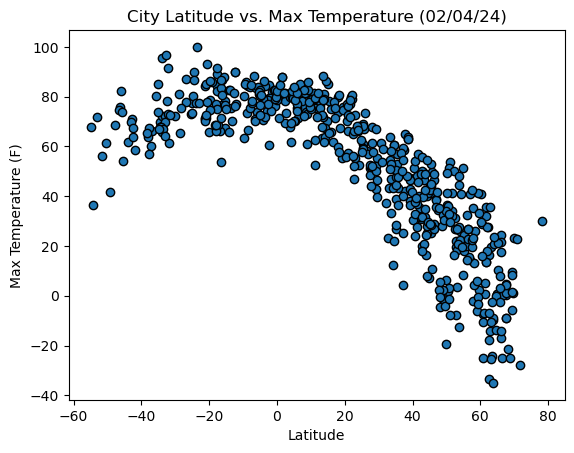

In [70]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

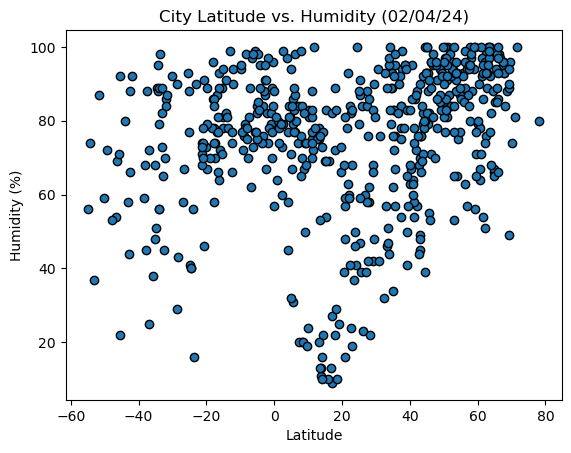

In [71]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

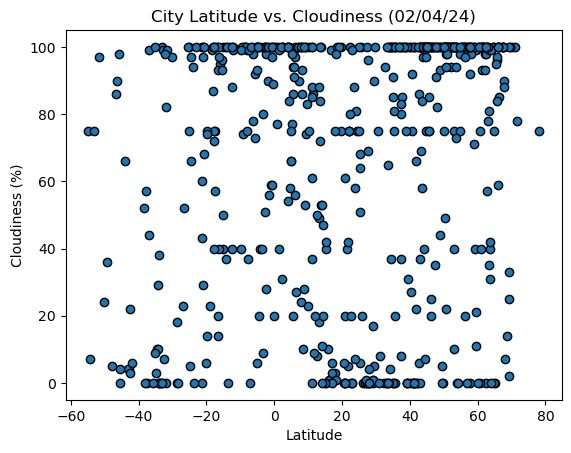

In [72]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

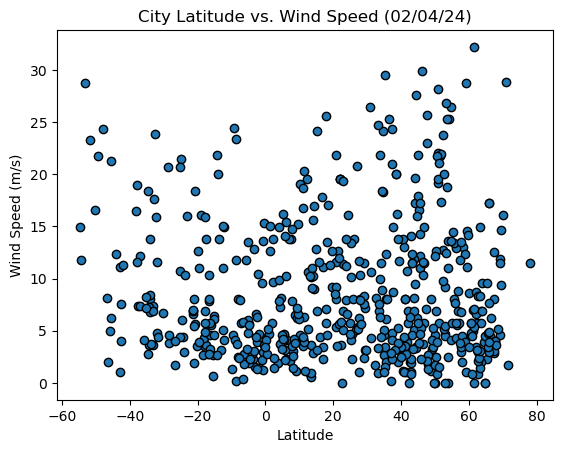

In [74]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [171]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, edgecolor = "black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [172]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,23.16,74,100,16.11,NO,1707096915
1,dodge city,37.7528,-100.0171,41.95,94,100,14.97,US,1707096915
2,cockburn town,21.4612,-71.1419,76.96,78,40,12.66,TC,1707096916
7,tongchuanshi,35.0806,109.0897,26.64,83,85,2.68,CN,1707096924
9,longyearbyen,78.2186,15.6401,30.04,80,75,11.50,SJ,1707096924


In [173]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,atafu village,-8.5421,-172.5159,84.25,79,100,23.35,TK,1707096916
4,adamstown,-25.0660,-130.1015,77.32,77,100,10.69,PN,1707096916
5,minas de marcona,-15.2119,-75.1103,67.37,81,50,6.40,PE,1707096916
6,grytviken,-54.2811,-36.5092,36.32,74,7,11.83,GS,1707096916
8,new norfolk,-42.7826,147.0587,71.10,44,4,11.12,AU,1707096924


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8743971815445154


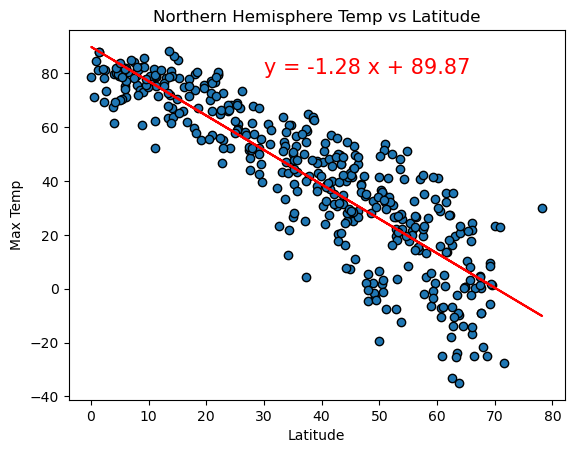

In [179]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern Hemisphere Temp vs Latitude", (30, 80))








The r-squared is: 0.4488341222629926


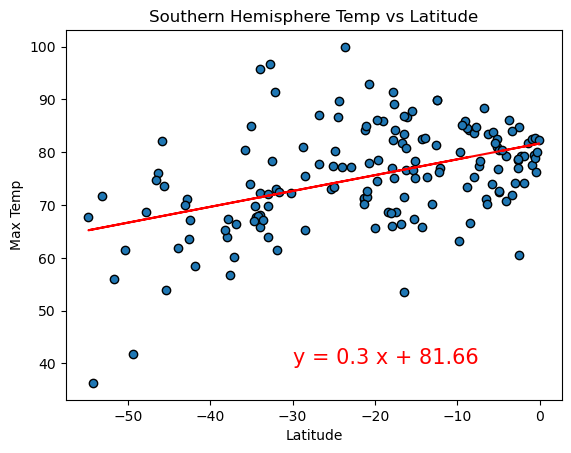

In [178]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern Hemisphere Temp vs Latitude", (-30, 40))

**Discussion about the linear relationship:** The closer you are to the equator, the higher the max temperature, especially in the Northern Hemisphere. The coorlation between the max temperature and latitude is much higher in the Northern Hemsphere; however, a slight coorelation does exist between the two variables in the Southern Hemsphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.42301553693813193


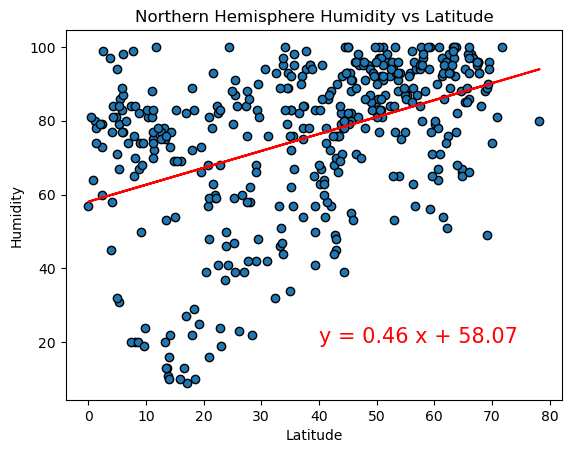

In [177]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern Hemisphere Humidity vs Latitude", (40, 20))


The r-squared is: 0.4140464709076562


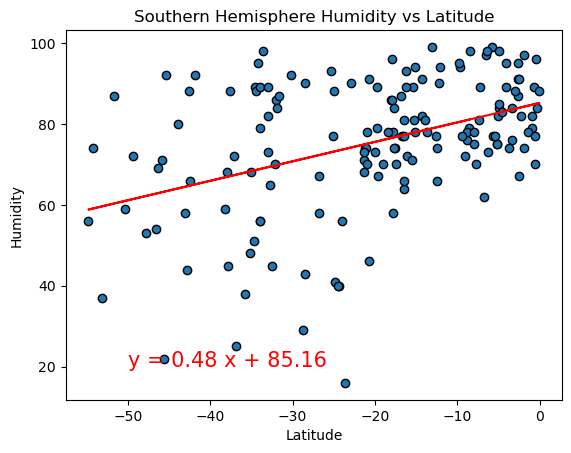

In [181]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern Hemisphere Humidity vs Latitude", (-50, 20))

**Discussion about the linear relationship:** There is a slightly positive correlation between humidity and latitude.  As the latitude coordinates increase, the perecentage of humidity rises. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.16912058671758043


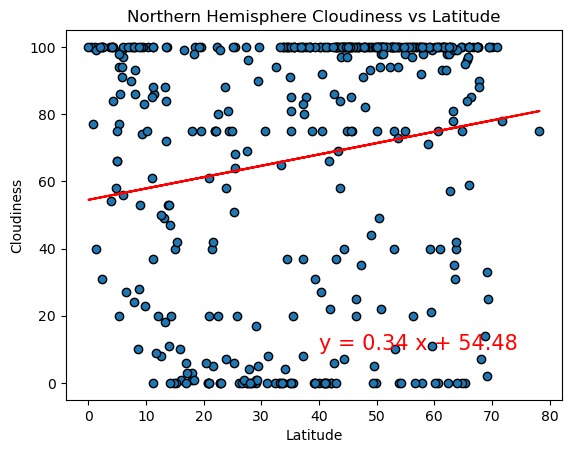

In [182]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern Hemisphere Cloudiness vs Latitude", (40, 10))


The r-squared is: 0.40651633943503346


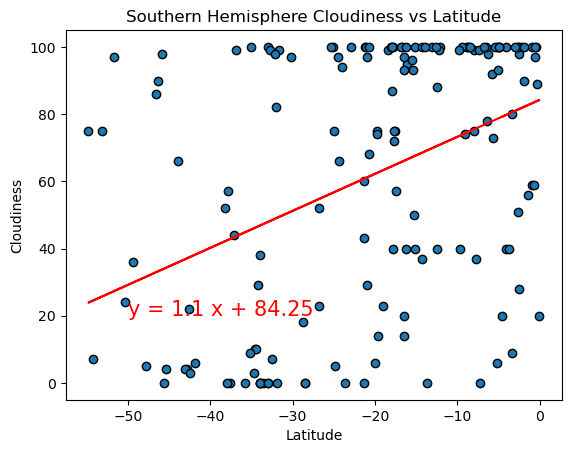

In [183]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern Hemisphere Cloudiness vs Latitude", (-50, 20))

**Discussion about the linear relationship:** Though there is a slightly positive trend in the southern hemisphere showing cloud increase as you move closer to the equater, overall a strong coorelation does not exist between the two variables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009180893884601702


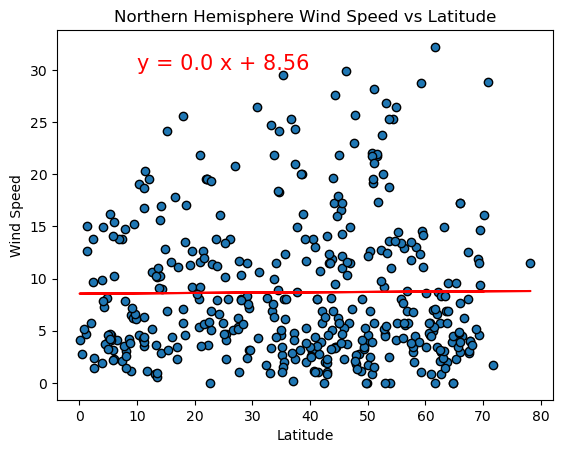

In [185]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern Hemisphere Wind Speed vs Latitude", (10, 30))


The r-squared is: -0.3726487668453059


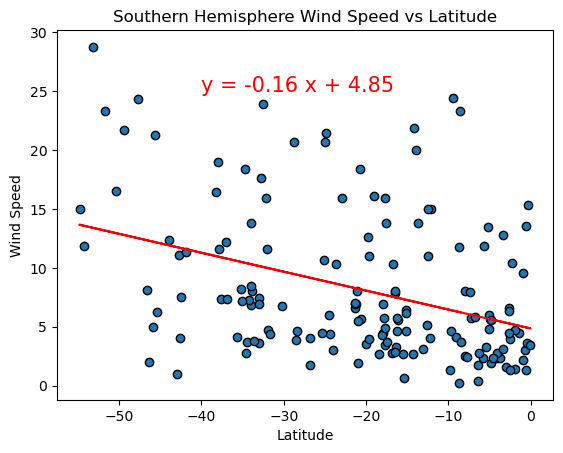

In [187]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern Hemisphere Wind Speed vs Latitude", (-40, 25))

**Discussion about the linear relationship:** Though it appears there is a slighly negative coorilation showing wind speed slowing down as you move closer to the equator; there is not a linear relationship between wind speed and latitude overall.  